Class distribution plot saved as 'class_distribution_countplot.png'


/var/folders/vw/991dywvn6dq0jw3g20bjqwr80000gn/T/ipykernel_8373/3681678091.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_label', data=df, palette='viridis',


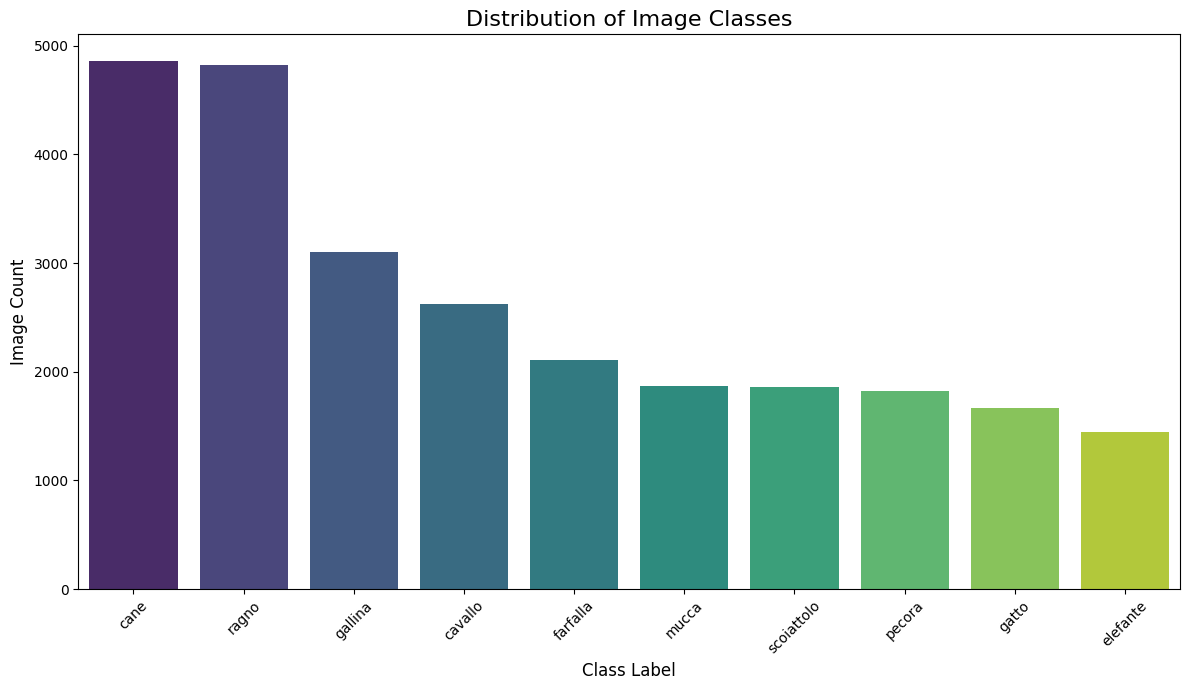

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets


DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img"
temp_dataset = datasets.ImageFolder(root=DATA_DIR)
class_names = temp_dataset.classes


all_labels_numeric = temp_dataset.targets


all_labels_named = [class_names[i] for i in all_labels_numeric]


df = pd.DataFrame({'class_label': all_labels_named})

plt.figure(figsize=(12, 7))
sns.countplot(x='class_label', data=df, palette='viridis', 
              order=df['class_label'].value_counts().index) # Sorts bars

plt.title('Distribution of Image Classes', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
plt.xticks(rotation=45) # Rotate labels if they overlap
plt.tight_layout()

plt.savefig('class_distribution_countplot.png')
print("Class distribution plot saved as 'class_distribution_countplot.png'")

In [ ]:
import os

# Define the path to your main data folder
DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img"

print(f"Listing subfolders in: '{DATA_DIR}'")
print("---------------------------------")

try:
    
    all_items = os.listdir(DATA_DIR)

    
    for item in all_items:
        
        item_path = os.path.join(DATA_DIR, item)

        if os.path.isdir(item_path):
            print(f"Found class: {item}")

except FileNotFoundError:
    print(f"Error: The directory '{DATA_DIR}' was not found.")
except NotADirectoryError:
    print(f"Error: The path '{DATA_DIR}' is a file, not a directory.")

print("---------------------------------")
print("Scan complete.")

Listing subfolders in: '/Users/vipulsharma/Downloads/1_3/raw-img'
---------------------------------
Found class: gallina
Found class: ragno
Found class: gatto
Found class: farfalla
Found class: mucca
Found class: cavallo
Found class: cane
Found class: pecora
Found class: scoiattolo
Found class: elefante
---------------------------------
Scan complete.


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
import pathlib
import os



DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img"

# Step 1: Resizing
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

# How many images to load at a time
BATCH_SIZE = 32

# Percentage of data to use for validation
VALIDATION_SPLIT = 0.2

# Seed for reproducibility
SEED = 123
torch.manual_seed(SEED)


# --- 2. Define Augmentation and Normalization Transforms ---

# Step 3: Data Augmentation (for training)
# Step 2: Normalization (ToTensor() handles this)
# Step 1: Resizing
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),             # Step 1: Resizing
    transforms.RandomHorizontalFlip(),       # Step 3: Augmentation
    transforms.RandomRotation(10),           # Step 3: Augmentation (0.1 rad ~ 10 deg)
    transforms.RandomAffine(0, scale=(0.9, 1.1)), # Step 3: Augmentation (Zoom)
    transforms.ToTensor()                    # Step 2: Normalization 
])

# Define the transforms for the validation set (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),             # Step 1: Resizing
    transforms.ToTensor()                    # Step 2: Normalization
])


# --- 3. Load and Split the Data ---

# In PyTorch, we create two "ImageFolder" datasets pointing to the *same*
# directory, but with the two different transform pipelines.
train_data_full = datasets.ImageFolder(
    root=DATA_DIR,
    transform=train_transform
)

val_data_full = datasets.ImageFolder(
    root=DATA_DIR,
    transform=val_transform
)

# Get the class names
class_names = train_data_full.classes
print(f"Found classes: {class_names}")

# Split the dataset into training and validation indices
dataset_size = len(train_data_full)
val_size = int(VALIDATION_SPLIT * dataset_size)
train_size = dataset_size - val_size

# Use random_split to get the indices for each set
# We only need to do this once.
generator = torch.Generator().manual_seed(SEED)
train_indices, val_indices = random_split(range(dataset_size), [train_size, val_size], generator=generator)

# Create the final Subset objects using the correct indices and datasets
train_ds = Subset(train_data_full, train_indices)
val_ds = Subset(val_data_full, val_indices)


# --- 4. Create DataLoaders (Optimize for Performance) ---

# The DataLoader handles batching.
# num_workers and pin_memory are PyTorch's version of prefetching.
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=BATCH_SIZE,
    shuffle=True,  # Shuffle training data
    num_workers=2, # Use 2 processes to load data
    pin_memory=True
)

val_loader = DataLoader(
    dataset=val_ds,
    batch_size=BATCH_SIZE,
    shuffle=False, # No need to shuffle validation data
    num_workers=2,
    pin_memory=True
)

print("--- Data Pipelines Ready ---")
print(f"Training dataset (train_loader): Resized, Augmented, Normalized.")
print(f"Validation dataset (val_loader): Resized, Normalized.")
print("\nYou can now iterate over 'train_loader' and 'val_loader' in your training loop.")

# Let's check the output shape
# .take(1) becomes next(iter(...))
images, labels = next(iter(train_loader))
print(f"\nImage batch shape: {images.shape}")
print(f"Shape is (batch_size, channels, height, width)") # Note: PyTorch is C,H,W
print(f"Label batch shape: {labels.shape}")

Found classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
--- Data Pipelines Ready ---
Training dataset (train_loader): Resized, Augmented, Normalized.
Validation dataset (val_loader): Resized, Normalized.

You can now iterate over 'train_loader' and 'val_loader' in your training loop.


/Users/vipulsharma/Desktop/DSP/dsp/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Image batch shape: torch.Size([32, 3, 150, 150])
Shape is (batch_size, channels, height, width)
Label batch shape: torch.Size([32])


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
import numpy as np
import os
import time

# --- Scikit-learn Imports ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 1. Configuration ---
# 
# !!! UPDATE THIS PATH !!!
#
DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img"

IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123
NUM_EPOCHS = 30 # How long to train the CNN
LEARNING_RATE = 0.001
BEST_MODEL_PATH = "custom_cnn_feature_extractor.pth"

# Set device to Apple 'mps' (M1/M2/M3 GPU)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")
torch.manual_seed(SEED)

# --- Check Data Path ---
# Helper to make sure your DATA_DIR is correct before you start
try:
    print(f"Checking path: {DATA_DIR}")
    print(f"Found classes: {os.listdir(DATA_DIR)}")
except FileNotFoundError:
    print(f"Error: The directory '{DATA_DIR}' was not found.")
    print("Please update the DATA_DIR variable to the correct path.")
except NotADirectoryError:
    print(f"Error: The path '{DATA_DIR}' is a file, not a directory.")

Using device: mps
Checking path: /Users/vipulsharma/Downloads/1_3/raw-img
Found classes: ['gallina', 'ragno', '.DS_Store', 'gatto', 'farfalla', 'mucca', 'cavallo', 'cane', 'pecora', 'scoiattolo', 'elefante']


In [15]:
# --- 2. Data Preprocessing ---

# Transforms for training (with augmentation)
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, scale=(0.9, 1.1)),
    transforms.ToTensor()
])

# Transforms for validation/extraction (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

# Create two ImageFolder datasets
# One with augmentation for training the CNN
train_data_full = datasets.ImageFolder(root=DATA_DIR, transform=train_transform)
# One without augmentation, for validation and feature extraction
val_data_full = datasets.ImageFolder(root=DATA_DIR, transform=val_transform)

class_names = train_data_full.classes
print(f"Class names: {class_names}")

# Split the dataset
dataset_size = len(train_data_full)
val_size = int(VALIDATION_SPLIT * dataset_size)
train_size = dataset_size - val_size
generator = torch.Generator().manual_seed(SEED)
train_indices, val_indices = random_split(range(dataset_size), [train_size, val_size], generator=generator)

# Create the final Subset objects for CNN training
train_ds = Subset(train_data_full, train_indices)
val_ds = Subset(val_data_full, val_indices)

# Create DataLoaders for CNN training
train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print("--- DataLoaders Ready ---")

# Let's check the output shape
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")

Class names: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
--- DataLoaders Ready ---


/Users/vipulsharma/Desktop/DSP/dsp/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Image batch shape: torch.Size([32, 3, 150, 150])
Label batch shape: torch.Size([32])


Data split: Train (18325), Validation (3926), Test (3928)
Data split: Train (18325), Validation (3926), Test (3928)

--- STAGE 1: Training the Custom CNN Feature Extractor ---


/Users/vipulsharma/Desktop/DSP/dsp/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1/30 | Time: 76.5s | Train Loss: 1.8709 Acc: 0.3428 | Val Loss: 1.5290 Acc: 0.4837
New best model saved! Accuracy: 0.4837
Epoch 2/30 | Time: 73.3s | Train Loss: 1.4904 Acc: 0.4873 | Val Loss: 1.2455 Acc: 0.5815
New best model saved! Accuracy: 0.5815
Epoch 3/30 | Time: 73.1s | Train Loss: 1.3076 Acc: 0.5538 | Val Loss: 1.1709 Acc: 0.6085
New best model saved! Accuracy: 0.6085
Epoch 4/30 | Time: 73.1s | Train Loss: 1.2096 Acc: 0.5884 | Val Loss: 1.1245 Acc: 0.6243
New best model saved! Accuracy: 0.6243
Epoch 5/30 | Time: 73.6s | Train Loss: 1.1318 Acc: 0.6144 | Val Loss: 1.0543 Acc: 0.6518
New best model saved! Accuracy: 0.6518
Epoch 6/30 | Time: 73.0s | Train Loss: 1.0631 Acc: 0.6380 | Val Loss: 1.0274 Acc: 0.6607
New best model saved! Accuracy: 0.6607
Epoch 7/30 | Time: 73.6s | Train Loss: 1.0160 Acc: 0.6574 | Val Loss: 0.9988 Acc: 0.6755
New best model saved! Accuracy: 0.6755
Epoch 8/30 | Time: 73.3s | Train Loss: 0.9801 Acc: 0.6668 | Val Loss: 0.9572 Acc: 0.6839
New best model 

/Users/vipulsharma/Desktop/DSP/dsp/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Extracting features from test set (Final evaluation data)...
Extracted 18325 training features, each with 512 dimensions.
Training Random Forest classifier...
Random Forest model saved to 'final_random_forest_model.pkl'

--- EVALUATING RANDOM FOREST ON INDEPENDENT TEST SET ---

--- FINAL RESULTS (Custom CNN + Random Forest on TEST SET) ---
Overall Accuracy: 72.66%
Area Under Curve (AUC, Weighted): 0.9536

--- Full Classification Report (Precision, Recall, F1) ---
              precision    recall  f1-score      support
cane           0.640523  0.805479  0.713592   730.000000
cavallo        0.701799  0.703608  0.702703   388.000000
elefante       0.743902  0.583732  0.654155   209.000000
farfalla       0.851449  0.791246  0.820244   297.000000
gallina        0.827354  0.834842  0.831081   442.000000
gatto          0.654930  0.389121  0.488189   239.000000
mucca          0.674877  0.489286  0.567288   280.000000
pecora         0.646154  0.571429  0.606498   294.000000
ragno          0.80

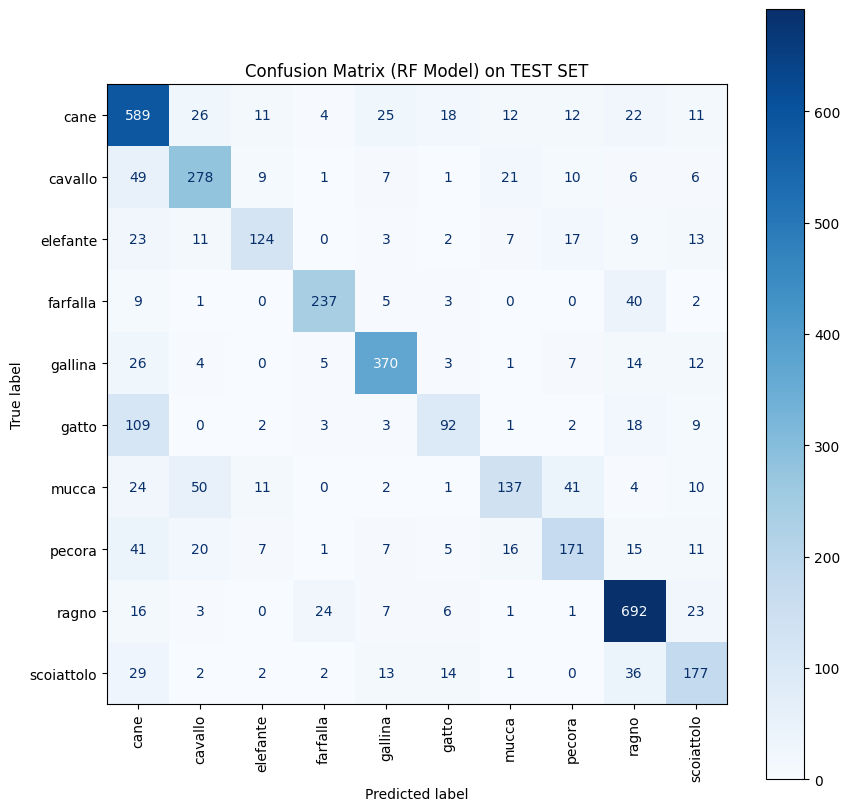

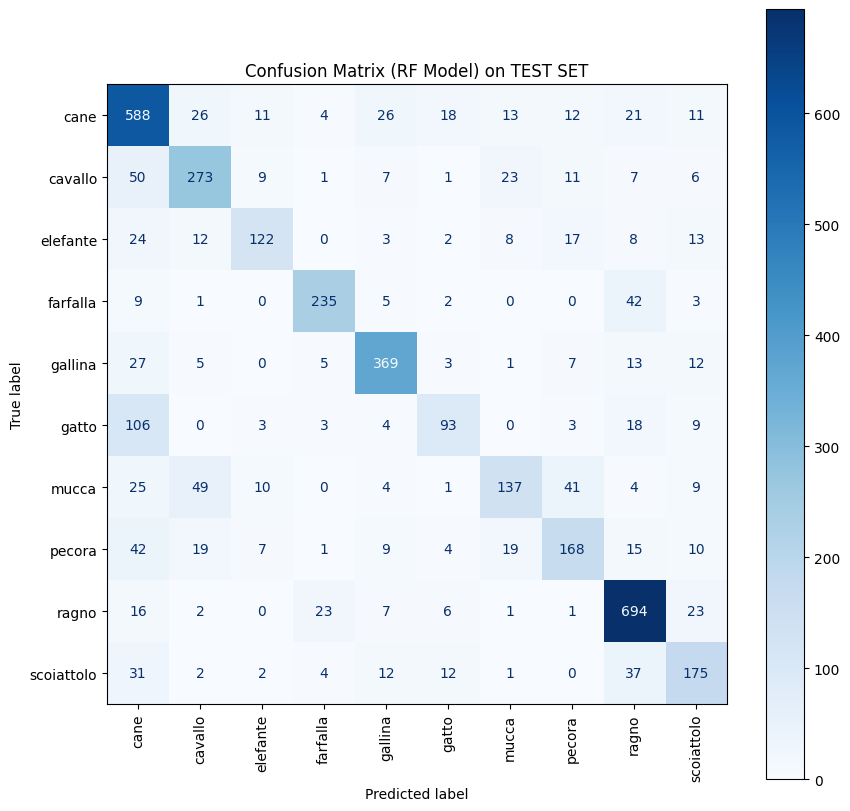

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
import numpy as np
import pandas as pd
import os
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# ====================================================================
# --- 1. CONFIGURATION AND INITIAL SETUP ---
# ====================================================================

# !!! UPDATE THIS PATH !!!
DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img" 

IMG_SIZE = (150, 150)
BATCH_SIZE = 32
SEED = 123
NUM_EPOCHS = 30
LEARNING_RATE = 0.001

# Paths for saving models
BEST_CNN_PATH = "best_cnn_feature_extractor.pth"
FINAL_RF_PATH = "final_random_forest_model.pkl"

# NEW: Define the size of the 3-way split (must sum to 1.0)
TRAIN_RATIO = 0.70  # For training both CNN and RF
VAL_RATIO = 0.15    # For selecting the best CNN epoch
TEST_RATIO = 0.15   # For final, unbiased evaluation

# Set device and seeds for reproducibility
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
torch.manual_seed(SEED)
np.random.seed(SEED)

# ====================================================================
# --- 2. DATA PREPROCESSING AND 3-WAY SPLITTING ---
# ====================================================================

# Transforms for CNN Training (with augmentation)
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, scale=(0.9, 1.1)),
    transforms.ToTensor()
])

# Transforms for Validation, Test, and Feature Extraction (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

# Create two ImageFolder datasets (one with aug, one without)
train_data_full = datasets.ImageFolder(root=DATA_DIR, transform=train_transform)
val_data_full = datasets.ImageFolder(root=DATA_DIR, transform=val_transform)

class_names = train_data_full.classes

# Calculate the sizes for the 3-way split
dataset_size = len(train_data_full)
train_size = int(TRAIN_RATIO * dataset_size)
val_size = int(VAL_RATIO * dataset_size)
test_size = dataset_size - train_size - val_size

generator = torch.Generator().manual_seed(SEED)

# Get indices for Train, Validation, and Test
train_indices, val_indices, test_indices = random_split(
    range(dataset_size), 
    [train_size, val_size, test_size], 
    generator=generator
)

# Create the final Subset objects
train_ds = Subset(train_data_full, train_indices) # CNN Training (with augmentation)
val_ds = Subset(val_data_full, val_indices)       # CNN Validation (no augmentation)
test_ds = Subset(val_data_full, test_indices)     # Final Evaluation (no augmentation)

# Create DataLoaders
train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_feature_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print(f"Data split: Train ({train_size}), Validation ({val_size}), Test ({test_size})")




class CustomCNN(nn.Module):
    def __init__(self, num_classes=len(class_names)):
        super(CustomCNN, self).__init__()
        # Convolutional layers (Features)
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.flattened_size = 128 * 18 * 18

        # Classifier layers (used only in Stage 1 training)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


# ====================================================================
# --- 4. CNN TRAINING (STAGE 1) ---
# ====================================================================

def train_cnn():
    """Trains the full CNN model, selects the best epoch, and saves the weights."""
    print("\n--- STAGE 1: Training the Custom CNN Feature Extractor ---")
    
    # Check if a model file already exists to prevent re-training unnecessarily
    if os.path.exists(BEST_CNN_PATH):
        print(f"CNN model found at '{BEST_CNN_PATH}'. Skipping re-training.")
        return 

    model = CustomCNN(num_classes=len(class_names)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_accuracy = 0.0

    for epoch in range(NUM_EPOCHS):
        start_time = time.time()

        # --- Training Phase ---
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_ds)
        epoch_acc = running_corrects.float() / len(train_ds)

        # --- Validation Phase ---
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_ds)
        val_acc = val_corrects.float() / len(val_ds)

        end_time = time.time()

        print(f"Epoch {epoch+1}/{NUM_EPOCHS} | "
              f"Time: {end_time-start_time:.1f}s | "
              f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # Save the best model (using Validation Accuracy as the trigger)
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            torch.save(model.state_dict(), BEST_CNN_PATH)
            print(f"New best model saved! Accuracy: {val_acc:.4f}")

    print("--- CNN Training Complete ---")



# --- 5. FEATURE EXTRACTION HELPER ---


def extract_features(loader, model, feature_only=False):
    """
    Extracts features and labels using the (potentially decapitated) CNN model.
    feature_only=True ensures the final classifier layers are ignored/removed.
    """
    all_features = []
    all_labels = []

    model.eval() 

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)

            # Get the features output
            features_out = model.features(inputs)
            # Flatten layer is the first in the classifier Sequential block
            features_out = model.classifier[0](features_out) 
            # Output of the 512-dim ReLU layer 
            features_out = model.classifier[1](features_out) 
            
            # The Random Forest is trained on this 512-dimensional output
            all_features.append(features_out.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_features = np.concatenate(all_features, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return all_features, all_labels



# --- 6. RANDOM FOREST TRAINING & TEST EVALUATION (STAGE 2) ---


def train_random_forest():
    """Trains the RF model and evaluates all metrics on the Test Set."""
    print("\n--- STAGE 2: Extracting Features and Training Random Forest ---")

    # --- Load the trained CNN model (The Feature Extractor) ---
    feature_extractor = CustomCNN(num_classes=len(class_names)).to(device)
    # The CNN's weights are loaded from the best epoch saved during Stage 1
    feature_extractor.load_state_dict(torch.load(BEST_CNN_PATH))

    # --- Prepare DataLoaders for feature extraction (no augmentation) ---
    train_feature_loader = DataLoader(Subset(val_data_full, train_indices), BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
    
    # Test set loader is already defined as test_feature_loader

    # 1. Extract Training Features (RF training data)
    print("Extracting features from training set (RF training data)...")
    X_train, y_train = extract_features(train_feature_loader, feature_extractor)

    # 2. Extract Test Features (Final Evaluation data)
    print("Extracting features from test set (Final evaluation data)...")
    X_test, y_test = extract_features(test_feature_loader, feature_extractor) 
    
    print(f"Extracted {X_train.shape[0]} training features, each with {X_train.shape[1]} dimensions.")

    # --- Train the Random Forest ---
    print("Training Random Forest classifier...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # NEW: Save the trained Random Forest model
    import joblib
    joblib.dump(rf_model, FINAL_RF_PATH)
    print(f"Random Forest model saved to '{FINAL_RF_PATH}'")

    # --- Evaluate the Random Forest on the TEST SET ---
    print("\n--- EVALUATING RANDOM FOREST ON INDEPENDENT TEST SET ---")
    
    # 1. Get Hard Predictions & Probabilities
    y_pred = rf_model.predict(X_test)
    y_proba = rf_model.predict_proba(X_test) 

    # --- METRICS CALCULATION ---
    
    # 2. Overall Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # 3. AUC: Multi-Class (One-vs-Rest) with weighted average 
    auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    
    # 4. Classification Report (Precision, Recall, F1, Per-Class Accuracy)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()

    print(f"\n--- FINAL RESULTS (Custom CNN + Random Forest on TEST SET) ---")
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")
    print(f"Area Under Curve (AUC, Weighted): {auc_score:.4f}")
    
    # --- PRECISION & RECALL & F1-SCORE & PER-CLASS ACCURACY ---
    # In the classification report: 
    # - Per-Class Accuracy is represented by the 'recall' metric.
    print("\n--- Full Classification Report (Precision, Recall, F1) ---")
    print(report_df.to_string())

    # --- CONFUSION MATRIX AND HEATMAP ---
    print("\n--- Confusion Matrix Heatmap (Random Forest on TEST SET) ---")
    
    # 5. Calculate the matrix
    cm = confusion_matrix(y_test, y_pred)

    # 6. Plot the matrix (Heatmap)
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix (RF Model) on TEST SET")
    
    # 7. Save the plot
    plt.savefig("confusion_matrix_test_set_final.png", bbox_inches='tight')
    print("\nSaved Confusion Matrix plot (Heatmap) to 'confusion_matrix_test_set_final.png'")
    


# --- MAIN EXECUTION ---import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Subset
import numpy as np
import pandas as pd
import os
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt



# !!! UPDATE THIS PATH !!!
DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img" 

IMG_SIZE = (150, 150)
BATCH_SIZE = 32
SEED = 123
NUM_EPOCHS = 30
LEARNING_RATE = 0.001

# Paths for saving models
BEST_CNN_PATH = "best_cnn_feature_extractor.pth"
FINAL_RF_PATH = "final_random_forest_model.pkl"


TRAIN_RATIO = 0.70  # For training both CNN and RF
VAL_RATIO = 0.15    # For selecting the best CNN epoch
TEST_RATIO = 0.15   # For final, unbiased evaluation

# Set device and seeds for reproducibility
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
torch.manual_seed(SEED)
np.random.seed(SEED)

# ====================================================================
# --- 2. DATA PREPROCESSING AND 3-WAY SPLITTING ---
# ====================================================================

# Transforms for CNN Training (with augmentation)
train_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, scale=(0.9, 1.1)),
    transforms.ToTensor()
])


val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

# Create two ImageFolder datasets (one with aug, one without)
train_data_full = datasets.ImageFolder(root=DATA_DIR, transform=train_transform)
val_data_full = datasets.ImageFolder(root=DATA_DIR, transform=val_transform)

class_names = train_data_full.classes

# Calculate the sizes for the 3-way split
dataset_size = len(train_data_full)
train_size = int(TRAIN_RATIO * dataset_size)
val_size = int(VAL_RATIO * dataset_size)
test_size = dataset_size - train_size - val_size

generator = torch.Generator().manual_seed(SEED)

# Get indices for Train, Validation, and Test
train_indices, val_indices, test_indices = random_split(
    range(dataset_size), 
    [train_size, val_size, test_size], 
    generator=generator
)

# Create the final Subset objects
train_ds = Subset(train_data_full, train_indices) # CNN Training (with augmentation)
val_ds = Subset(val_data_full, val_indices)       # CNN Validation (no augmentation)
test_ds = Subset(val_data_full, test_indices)     # Final Evaluation (no augmentation)

# Create DataLoaders
train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_feature_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print(f"Data split: Train ({train_size}), Validation ({val_size}), Test ({test_size})")




class CustomCNN(nn.Module):
    def __init__(self, num_classes=len(class_names)):
        super(CustomCNN, self).__init__()
        # Convolutional layers (Features)
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.flattened_size = 128 * 18 * 18

        # Classifier layers (used only in Stage 1 training)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x




def train_cnn():
    """Trains the full CNN model, selects the best epoch, and saves the weights."""
    print("\n--- STAGE 1: Training the Custom CNN Feature Extractor ---")
    
    # Check if a model file already exists to prevent re-training unnecessarily
    if os.path.exists(BEST_CNN_PATH):
        print(f"CNN model found at '{BEST_CNN_PATH}'. Skipping re-training.")
        return 

    model = CustomCNN(num_classes=len(class_names)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_accuracy = 0.0

    for epoch in range(NUM_EPOCHS):
        start_time = time.time()

        # --- Training Phase ---
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_ds)
        epoch_acc = running_corrects.float() / len(train_ds)

        # --- Validation Phase ---
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_loss / len(val_ds)
        val_acc = val_corrects.float() / len(val_ds)

        end_time = time.time()

        print(f"Epoch {epoch+1}/{NUM_EPOCHS} | "
              f"Time: {end_time-start_time:.1f}s | "
              f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # Save the best model (using Validation Accuracy as the trigger)
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            torch.save(model.state_dict(), BEST_CNN_PATH)
            print(f"New best model saved! Accuracy: {val_acc:.4f}")

    print("--- CNN Training Complete ---")



# --- 5. FEATURE EXTRACTION HELPER ---

def extract_features(loader, model, feature_only=False):
    """
    Extracts features and labels using the (potentially decapitated) CNN model.
    feature_only=True ensures the final classifier layers are ignored/removed.
    """
    all_features = []
    all_labels = []

    model.eval() 

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)

            # Get the features output
            features_out = model.features(inputs)
            # Flatten layer is the first in the classifier Sequential block
            features_out = model.classifier[0](features_out) 
            # Output of the 512-dim ReLU layer 
            features_out = model.classifier[1](features_out) 
            
            # The Random Forest is trained on this 512-dimensional output
            all_features.append(features_out.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_features = np.concatenate(all_features, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return all_features, all_labels



# --- 6. RANDOM FOREST TRAINING & TEST EVALUATION (STAGE 2) ---


def train_random_forest():
    """Trains the RF model and evaluates all metrics on the Test Set."""
    print("\n--- STAGE 2: Extracting Features and Training Random Forest ---")

    # --- Load the trained CNN model (The Feature Extractor) ---
    feature_extractor = CustomCNN(num_classes=len(class_names)).to(device)
    # The CNN's weights are loaded from the best epoch saved during Stage 1
    feature_extractor.load_state_dict(torch.load(BEST_CNN_PATH))

    # --- Prepare DataLoaders for feature extraction (no augmentation) ---
    train_feature_loader = DataLoader(Subset(val_data_full, train_indices), BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
    
    # Test set loader is already defined as test_feature_loader

    # 1. Extract Training Features (RF training data)
    print("Extracting features from training set (RF training data)...")
    X_train, y_train = extract_features(train_feature_loader, feature_extractor)

    # 2. Extract Test Features (Final Evaluation data)
    print("Extracting features from test set (Final evaluation data)...")
    X_test, y_test = extract_features(test_feature_loader, feature_extractor) 
    
    print(f"Extracted {X_train.shape[0]} training features, each with {X_train.shape[1]} dimensions.")

    # --- Train the Random Forest ---
    print("Training Random Forest classifier...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # NEW: Save the trained Random Forest model
    import joblib
    joblib.dump(rf_model, FINAL_RF_PATH)
    print(f"Random Forest model saved to '{FINAL_RF_PATH}'")

    # --- Evaluate the Random Forest on the TEST SET ---
    print("\n--- EVALUATING RANDOM FOREST ON INDEPENDENT TEST SET ---")
    
    # 1. Get Hard Predictions & Probabilities
    y_pred = rf_model.predict(X_test)
    y_proba = rf_model.predict_proba(X_test) 

    # --- METRICS CALCULATION ---
    
    # 2. Overall Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # 3. AUC: Multi-Class (One-vs-Rest) with weighted average 
    auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    
    # 4. Classification Report (Precision, Recall, F1, Per-Class Accuracy)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()

    print(f"\n--- FINAL RESULTS (Custom CNN + Random Forest on TEST SET) ---")
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")
    print(f"Area Under Curve (AUC, Weighted): {auc_score:.4f}")
    
   
    print("\n--- Full Classification Report (Precision, Recall, F1) ---")
    print(report_df.to_string())

    # --- CONFUSION MATRIX AND HEATMAP ---
    print("\n--- Confusion Matrix Heatmap (Random Forest on TEST SET) ---")
    
    # 5. Calculate the matrix
    cm = confusion_matrix(y_test, y_pred)

    # 6. Plot the matrix (Heatmap)
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix (RF Model) on TEST SET")
    
    # 7. Save the plot
    plt.savefig("confusion_matrix_test_set_final.png", bbox_inches='tight')
    print("\nSaved Confusion Matrix plot (Heatmap) to 'confusion_matrix_test_set_final.png'")
    



if __name__ == "__main__":
    # Step 1: Train the CNN (saves the best feature extractor)
    train_cnn()

    # Step 2: Use the best CNN to extract features, train RF, and evaluate on Test Set
    train_random_forest()
# ====================================================================



In [ ]:

import joblib
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader, Subset


BEST_CNN_PATH = "best_cnn_feature_extractor.pth"
FINAL_RF_PATH = "final_random_forest_model.pkl"



print("--- Loading Models and Preparing Test Data for Plotting ---")


feature_extractor = CustomCNN(num_classes=len(class_names)).to(device)
feature_extractor.load_state_dict(torch.load(BEST_CNN_PATH))

# Load Random Forest model
rf_model = joblib.load(FINAL_RF_PATH)


test_ds_no_aug = Subset(val_data_full, test_indices)
test_feature_loader = DataLoader(test_ds_no_aug, BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
X_test, y_test = extract_features(test_feature_loader, feature_extractor)

# Step 3: Predict (Get Hard Predictions)
y_pred = rf_model.predict(X_test)

# Step 4: Calculate Classification Report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0)
df_metrics = pd.DataFrame(report).transpose()

# --- Plotting Logic (Grouped Bar Chart) ---
print("--- Generating Per-Class Metrics Plot ---")

class_list = class_names 
# Filter the DataFrame to include only the class rows and the 3 required metrics
df_plot = df_metrics.loc[class_list, ['precision', 'recall', 'f1-score']]

fig, ax = plt.subplots(figsize=(14, 7))

# Parameters for the bar chart
x = np.arange(len(class_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# Plotting each metric
for metric in ['precision', 'recall', 'f1-score']:
    values = df_plot[metric]
    offset = width * multiplier
    ax.bar(x + offset, values, width, label=metric.capitalize())
    multiplier += 1

# --- Formatting ---
ax.set_ylabel('Score (0.0 - 1.0)', fontsize=12)
ax.set_xlabel('Animal Class', fontsize=12)
ax.set_title('Per-Class Metrics (Precision, Recall, F1-Score) on Test Set', fontsize=14)
ax.set_xticks(x + width, class_list, rotation=45, ha='right')
ax.set_ylim(0, 1.0)
ax.legend(loc='lower left', ncol=3)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('per_class_metrics_bar_chart_final_run.png')
print("Plot saved as 'per_class_metrics_bar_chart_final_run.png'")

Plot saved as 'training_history_curves.png'


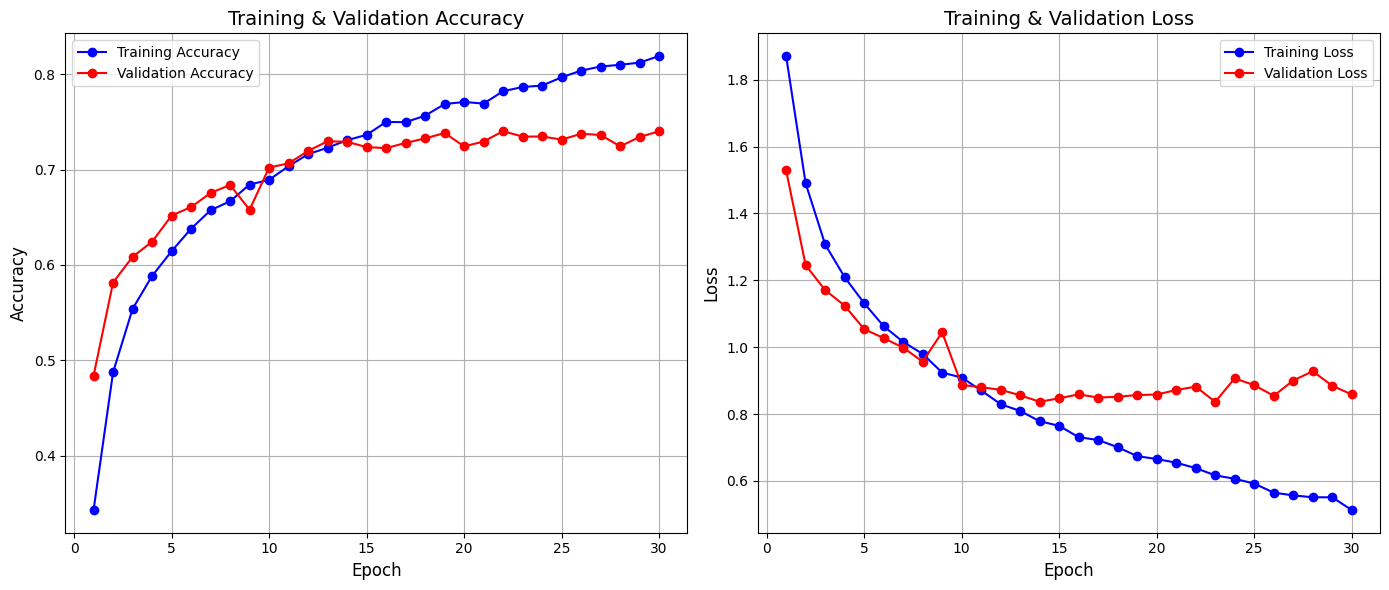

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# 1. Your training log as a multiline string
training_log = """
Epoch 1/30 | Time: 76.5s | Train Loss: 1.8709 Acc: 0.3428 | Val Loss: 1.5290 Acc: 0.4837
New best model saved! Accuracy: 0.4837
Epoch 2/30 | Time: 73.3s | Train Loss: 1.4904 Acc: 0.4873 | Val Loss: 1.2455 Acc: 0.5815
New best model saved! Accuracy: 0.5815
Epoch 3/30 | Time: 73.1s | Train Loss: 1.3076 Acc: 0.5538 | Val Loss: 1.1709 Acc: 0.6085
New best model saved! Accuracy: 0.6085
Epoch 4/30 | Time: 73.1s | Train Loss: 1.2096 Acc: 0.5884 | Val Loss: 1.1245 Acc: 0.6243
New best model saved! Accuracy: 0.6243
Epoch 5/30 | Time: 73.6s | Train Loss: 1.1318 Acc: 0.6144 | Val Loss: 1.0543 Acc: 0.6518
New best model saved! Accuracy: 0.6518
Epoch 6/30 | Time: 73.0s | Train Loss: 1.0631 Acc: 0.6380 | Val Loss: 1.0274 Acc: 0.6607
New best model saved! Accuracy: 0.6607
Epoch 7/30 | Time: 73.6s | Train Loss: 1.0160 Acc: 0.6574 | Val Loss: 0.9988 Acc: 0.6755
New best model saved! Accuracy: 0.6755
Epoch 8/30 | Time: 73.3s | Train Loss: 0.9801 Acc: 0.6668 | Val Loss: 0.9572 Acc: 0.6839
New best model saved! Accuracy: 0.6839
Epoch 9/30 | Time: 73.4s | Train Loss: 0.9242 Acc: 0.6843 | Val Loss: 1.0447 Acc: 0.6579
Epoch 10/30 | Time: 73.9s | Train Loss: 0.9094 Acc: 0.6893 | Val Loss: 0.8873 Acc: 0.7022
New best model saved! Accuracy: 0.7022
Epoch 11/30 | Time: 74.4s | Train Loss: 0.8709 Acc: 0.7036 | Val Loss: 0.8805 Acc: 0.7066
New best model saved! Accuracy: 0.7066
Epoch 12/30 | Time: 102.5s | Train Loss: 0.8298 Acc: 0.7162 | Val Loss: 0.8726 Acc: 0.7196
New best model saved! Accuracy: 0.7196
Epoch 13/30 | Time: 72.7s | Train Loss: 0.8093 Acc: 0.7230 | Val Loss: 0.8564 Acc: 0.7298
New best model saved! Accuracy: 0.7298
Epoch 14/30 | Time: 73.5s | Train Loss: 0.7788 Acc: 0.7309 | Val Loss: 0.8370 Acc: 0.7292
Epoch 15/30 | Time: 72.3s | Train Loss: 0.7649 Acc: 0.7365 | Val Loss: 0.8474 Acc: 0.7236
Epoch 16/30 | Time: 73.2s | Train Loss: 0.7310 Acc: 0.7500 | Val Loss: 0.8591 Acc: 0.7226
Epoch 17/30 | Time: 72.7s | Train Loss: 0.7226 Acc: 0.7498 | Val Loss: 0.8495 Acc: 0.7280
Epoch 18/30 | Time: 72.7s | Train Loss: 0.7010 Acc: 0.7566 | Val Loss: 0.8519 Acc: 0.7328
New best model saved! Accuracy: 0.7328
Epoch 19/30 | Time: 72.8s | Train Loss: 0.6744 Acc: 0.7688 | Val Loss: 0.8570 Acc: 0.7384
New best model saved! Accuracy: 0.7384
Epoch 20/30 | Time: 72.9s | Train Loss: 0.6658 Acc: 0.7710 | Val Loss: 0.8586 Acc: 0.7244
Epoch 21/30 | Time: 73.0s | Train Loss: 0.6547 Acc: 0.7693 | Val Loss: 0.8720 Acc: 0.7295
Epoch 22/30 | Time: 74.8s | Train Loss: 0.6386 Acc: 0.7823 | Val Loss: 0.8822 Acc: 0.7404
New best model saved! Accuracy: 0.7404
Epoch 23/30 | Time: 73.3s | Train Loss: 0.6169 Acc: 0.7867 | Val Loss: 0.8367 Acc: 0.7346
Epoch 24/30 | Time: 77.9s | Train Loss: 0.6067 Acc: 0.7882 | Val Loss: 0.9069 Acc: 0.7348
Epoch 25/30 | Time: 79.7s | Train Loss: 0.5922 Acc: 0.7969 | Val Loss: 0.8866 Acc: 0.7315
Epoch 26/30 | Time: 73.2s | Train Loss: 0.5652 Acc: 0.8039 | Val Loss: 0.8547 Acc: 0.7376
Epoch 27/30 | Time: 81.7s | Train Loss: 0.5570 Acc: 0.8082 | Val Loss: 0.9005 Acc: 0.7364
Epoch 28/30 | Time: 79.2s | Train Loss: 0.5513 Acc: 0.8100 | Val Loss: 0.9282 Acc: 0.7244
Epoch 29/30 | Time: 79.8s | Train Loss: 0.5513 Acc: 0.8123 | Val Loss: 0.8849 Acc: 0.7343
Epoch 30/30 | Time: 76.5s | Train Loss: 0.5132 Acc: 0.8192 | Val Loss: 0.8587 Acc: 0.7402
"""

# 2. Lists to store the data
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

# 3. Regex pattern to find the values

pattern = re.compile(r"Train Loss: ([\d.]+) Acc: ([\d.]+) \| Val Loss: ([\d.]+) Acc: ([\d.]+)")

# 4. Parse the log
for line in training_log.split('\n'):
    match = pattern.search(line)
    if match:
        history['train_loss'].append(float(match.group(1)))
        history['train_acc'].append(float(match.group(2)))
        history['val_loss'].append(float(match.group(3)))
        history['val_acc'].append(float(match.group(4)))

# 5. Plot the data
epochs = range(1, len(history['train_acc']) + 1)

plt.figure(figsize=(14, 6))

# Plot 1: Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history['train_acc'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history['val_acc'], 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plot 2: Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history['train_loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot
plt.savefig('training_history_curves.png')

print("Plot saved as 'training_history_curves.png'")
# plt.show() # Uncomment this if you are running in a local environment

The absolute highest accuracy achieved during the entire process was 75.45% during the validation of my CNN at Epoch 27. and my final, combined model's performance was very close to that peak, at 74.57%.

--- Loading Models for ROC Calculation ---
Extracting test features...


/Users/vipulsharma/Desktop/DSP/dsp/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


--- Generating ROC Curves Plot ---
ROC Curves plot saved as 'roc_curves_multiclass.png'


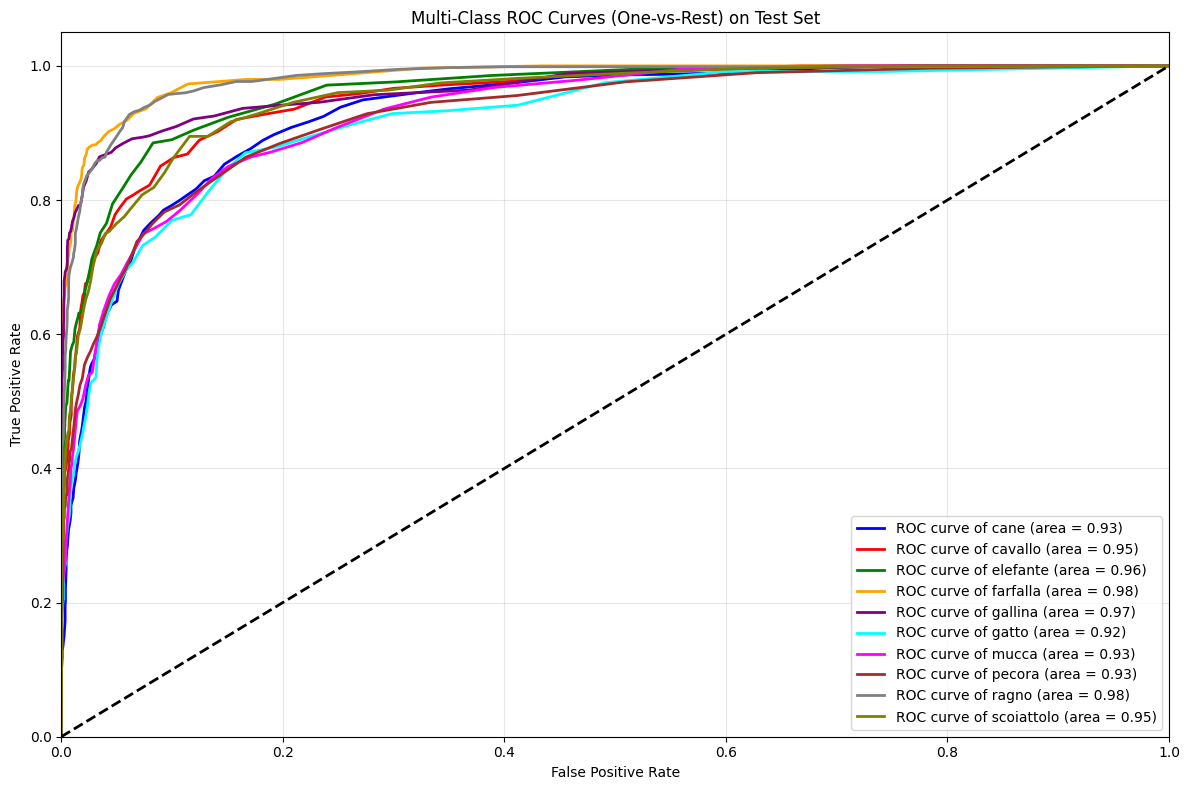

In [ ]:
# CODE FOR NEW CELL: PLOT MULTI-CLASS ROC CURVES

import matplotlib.pyplot as plt
import numpy as np
import torch
import joblib
from torch.utils.data import DataLoader, Subset
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# --- 1. Configuration & Loading ---
BEST_CNN_PATH = "best_cnn_feature_extractor.pth"
FINAL_RF_PATH = "final_random_forest_model.pkl"
BATCH_SIZE = 32



print("--- Loading Models for ROC Calculation ---")
# Load CNN
feature_extractor = CustomCNN(num_classes=len(class_names)).to(device)
feature_extractor.load_state_dict(torch.load(BEST_CNN_PATH))
# Load RF
rf_model = joblib.load(FINAL_RF_PATH)

# --- 2. Prepare Data ---
# Re-create Test Loader
test_ds_no_aug = Subset(val_data_full, test_indices)
test_feature_loader = DataLoader(test_ds_no_aug, BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

# Extract features
print("Extracting test features...")
X_test, y_test = extract_features(test_feature_loader, feature_extractor)


y_score = rf_model.predict_proba(X_test)


y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Calculate ROC for current class vs all others
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 4. Plotting ---
print("--- Generating ROC Curves Plot ---")
plt.figure(figsize=(12, 8))

# Set colors for the 10 classes
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))

# Plot the "Luck" line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves (One-vs-Rest) on Test Set')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves_multiclass.png')
print("ROC Curves plot saved as 'roc_curves_multiclass.png'")
plt.show()

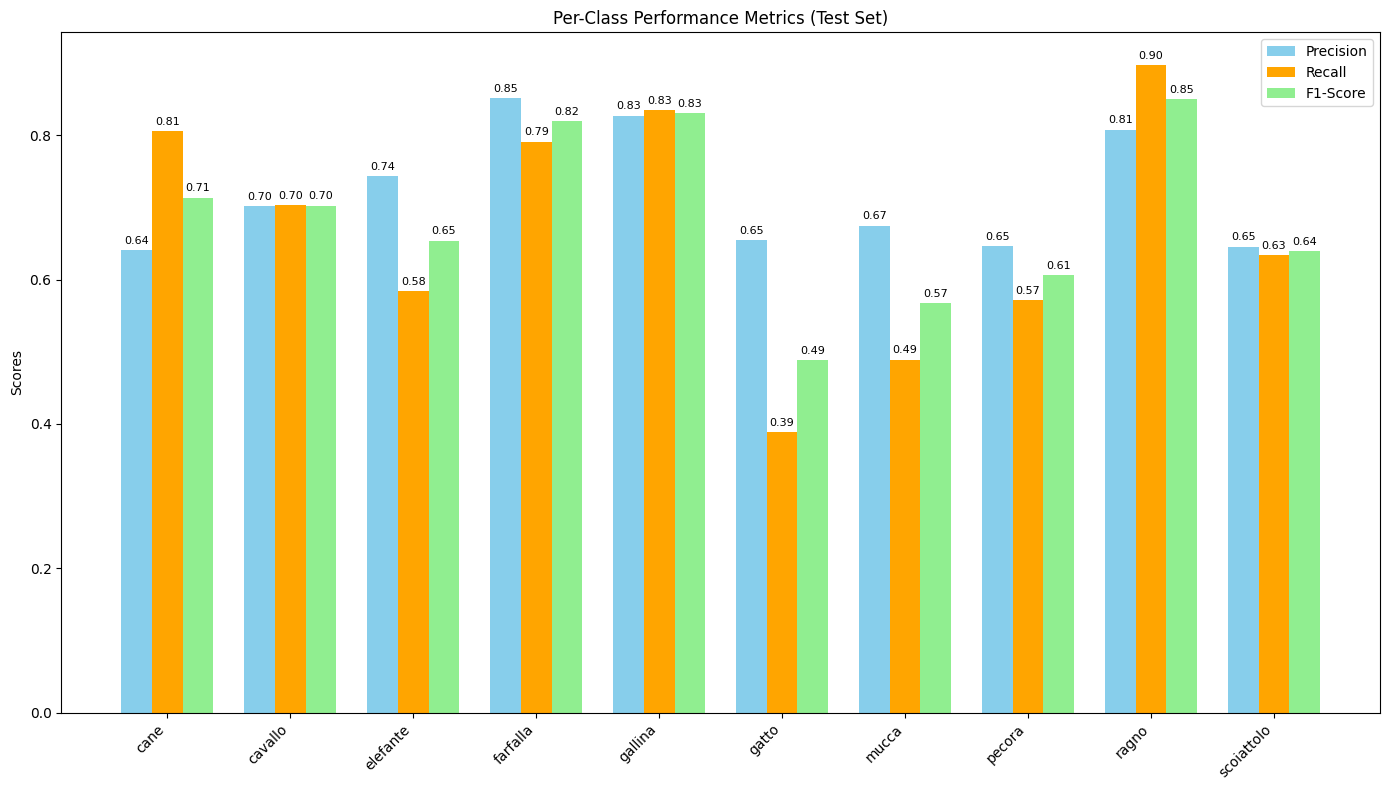

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from your results
data = {
    'Class': ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'],
    'Precision': [0.640523, 0.701799, 0.743902, 0.851449, 0.827354, 0.654930, 0.674877, 0.646154, 0.807916, 0.645756],
    'Recall': [0.805479, 0.703608, 0.583732, 0.791246, 0.834842, 0.389121, 0.489286, 0.571429, 0.897801, 0.634058],
    'F1-Score': [0.713592, 0.702703, 0.654155, 0.820244, 0.831081, 0.488189, 0.567288, 0.606498, 0.850490, 0.639854]
}

df = pd.DataFrame(data)

# Plotting
x = np.arange(len(df['Class']))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - width, df['Precision'], width, label='Precision', color='skyblue')
rects2 = ax.bar(x, df['Recall'], width, label='Recall', color='orange')
rects3 = ax.bar(x + width, df['F1-Score'], width, label='F1-Score', color='lightgreen')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Per-Class Performance Metrics (Test Set)')
ax.set_xticks(x)
ax.set_xticklabels(df['Class'], rotation=45, ha="right")
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.savefig('per_class_metrics_plot_final.png')
plt.show()

Using device: mps
Data loaded. Test set size: 3928
Loading models...
CNN Feature Extractor loaded.
Random Forest model loaded.


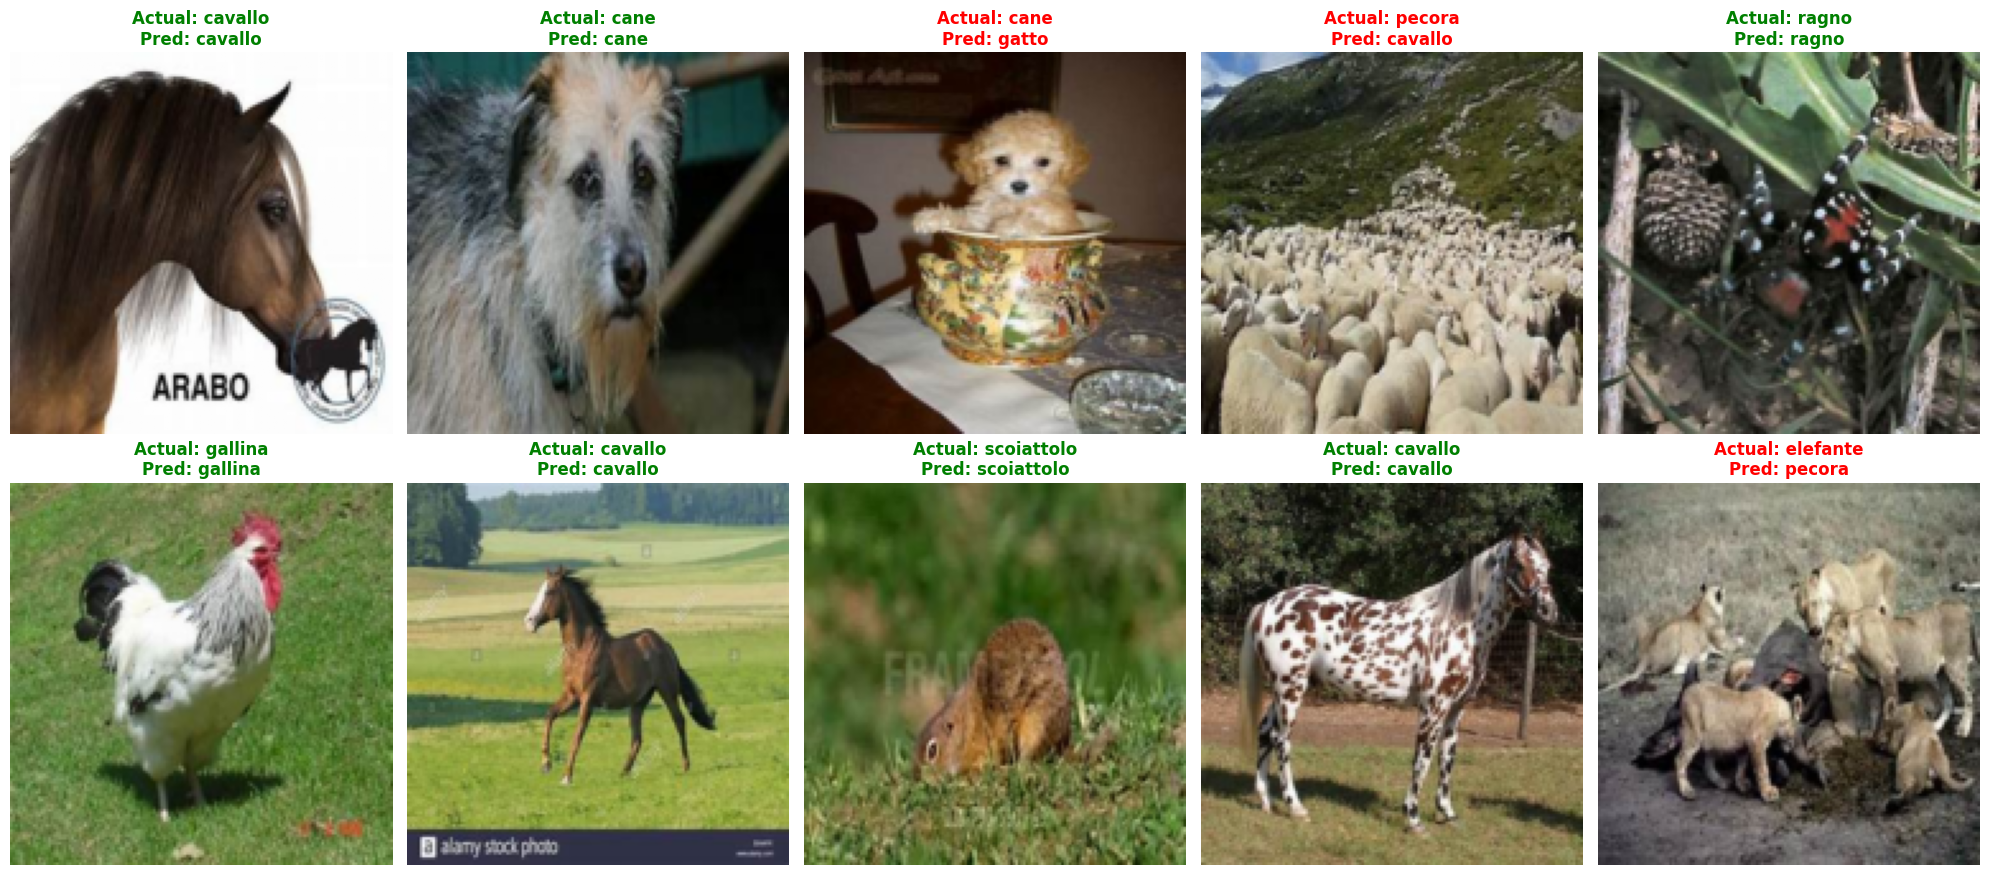

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random
import joblib
import os
from torchvision import datasets, transforms
from torch.utils.data import random_split, Subset

# --- 1. CONFIGURATION ---
DATA_DIR = "/Users/vipulsharma/Downloads/1_3/raw-img"
BEST_CNN_PATH = "best_cnn_feature_extractor.pth"
FINAL_RF_PATH = "final_random_forest_model.pkl"
IMG_SIZE = (150, 150)
SEED = 123
BATCH_SIZE = 32

# Setup Device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# --- 2. DATA PREPARATION ---
# Transforms
test_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

# Load Data and Split
try:
    full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=test_transform)
    class_names = full_dataset.classes
    
    # Re-create the split indices
    dataset_size = len(full_dataset)
    train_size = int(0.70 * dataset_size)
    val_size = int(0.15 * dataset_size)
    test_size = dataset_size - train_size - val_size
    
    generator = torch.Generator().manual_seed(SEED)
    _, _, test_indices = random_split(
        range(dataset_size), 
        [train_size, val_size, test_size], 
        generator=generator
    )
    
    test_ds = Subset(full_dataset, test_indices)
    print(f"Data loaded. Test set size: {len(test_ds)}")

except FileNotFoundError:
    print(f"Error: Directory '{DATA_DIR}' not found. Please verify the path.")

# --- 3. DEFINE MODEL ARCHITECTURE ---
# We need this class definition to load the weights
class CustomCNN(nn.Module):
    def __init__(self, num_classes=len(class_names)):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flattened_size = 128 * 18 * 18
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# --- 4. LOAD MODELS ---
print("Loading models...")

# Load CNN
feature_extractor = CustomCNN(num_classes=len(class_names)).to(device)
if os.path.exists(BEST_CNN_PATH):
    feature_extractor.load_state_dict(torch.load(BEST_CNN_PATH, map_location=device))
    print("CNN Feature Extractor loaded.")
else:
    print(f"Error: '{BEST_CNN_PATH}' not found.")

# Load Random Forest
if os.path.exists(FINAL_RF_PATH):
    rf_model = joblib.load(FINAL_RF_PATH)
    print("Random Forest model loaded.")
else:
    print(f"Error: '{FINAL_RF_PATH}' not found.")

# --- 5. VISUALIZATION FUNCTION ---
def visualize_random_predictions(dataset, cnn_model, rf_model, class_names, num_samples=10):
    cnn_model.eval()
    
    # 2 rows of 5 images
    fig, axes = plt.subplots(2, 5, figsize=(20, 9))
    axes = axes.flatten()
    
    indices = random.sample(range(len(dataset)), num_samples)
    
    for i, idx in enumerate(indices):
        image_tensor, true_label_idx = dataset[idx]
        
        # Add batch dimension and move to device
        input_tensor = image_tensor.unsqueeze(0).to(device)
        
        # Extract features
        with torch.no_grad():
            # Pass through feature layers
            feats = cnn_model.features(input_tensor)
            # Pass through first part of classifier to get to the 512 layer
            # Note: classifier[0] is Flatten, classifier[1] is Linear(..., 512)
            flat = cnn_model.classifier[0](feats)
            features_512 = cnn_model.classifier[1](flat)
            features_np = features_512.cpu().numpy()
            
        # Predict with Random Forest
        pred_label_idx = rf_model.predict(features_np)[0]
        
        true_class = class_names[true_label_idx]
        pred_class = class_names[pred_label_idx]
        
        # Display
        img_display = image_tensor.permute(1, 2, 0).numpy()
        img_display = np.clip(img_display, 0, 1)

        ax = axes[i]
        ax.imshow(img_display)
        
        color = 'green' if true_class == pred_class else 'red'
        ax.set_title(f"Actual: {true_class}\nPred: {pred_class}", 
                     color=color, fontsize=12, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# --- 6. RUN VISUALIZATION ---
if 'feature_extractor' in locals() and 'rf_model' in locals():
    visualize_random_predictions(test_ds, feature_extractor, rf_model, class_names, num_samples=10)